File Import And Read File


In [56]:
from scipy.stats import ttest_ind
from scipy.stats import t,f
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats
import pandas as pd
import numpy as np

# Correct file path
file_path = '/content/Dataset_psp.xlsx'

# Load the dataset
data = pd.read_excel(file_path)

# Display the first few rows of the dataset
# print(data.head(15))
data_dropped = data.dropna(how='all')
print(data_dropped)
col1=data_dropped['AP']
col2=data_dropped['PE']
col1=col1.dropna()
col2=col2.dropna()

#finding the mean ,median and mode
print(f"the mean of the data of the col1 is {np.mean(col1)}")
print(f"the mean of the data of the col2 is {np.mean(col2)}")
print(f"the median of the data of the col1 is {np.median(col1)}")
print(f"the median of the data of the col2 is {np.median(col2)}")


        AT      V       AP     RH      PE
5    16.75  42.23  1013.81  84.98  464.87
6    21.47  58.79  1017.00  76.97  446.33
7    25.98  68.12  1011.36  66.86  439.00
8    16.34  36.99  1006.99  90.06  466.24
9    25.23  69.34  1009.51  82.87  445.92
..     ...    ...      ...    ...     ...
115   6.02  43.65  1013.85  83.53  481.92
116  30.05  56.90  1007.02  41.96  437.55
117  29.23  68.14  1004.31  81.46  428.87
118  26.03  64.44  1012.75  62.24  445.89
119  26.38  49.50  1012.82  37.19  457.81

[115 rows x 5 columns]
the mean of the data of the col1 is 1013.4903478260869
the mean of the data of the col2 is 455.1640869565217
the median of the data of the col1 is 1012.75
the median of the data of the col2 is 452.82


Applying the T test on the data


In [46]:

#perform the independent ttest on the the both dataset
t_stat,p_val=ttest_ind(col1,col2)
#taking input neceesary terms to calculate t statistic and crtical
alpha=int(input("Enter signicance level for test(in percentage): "))
alpha=alpha/100
df=int(input("Enter no of Objects(n): "))
df=df-1
null_hyo=input("Enter NULL hypotesis: ")
alternate_hypo=input("Enter Alternate hypotesis: ")
tail=int(input("Enter tail: "))
#printing the crtical and statical value of t
print("T-statistic:", t_stat)
print("P-value:", p_val)
if(tail==2):
  t_critical = t.ppf(1 - alpha/2, df)


else:
  t_critical= t.ppf(1 - alpha, df)
print(f"t crtical for  {alpha} significance level { t_critical}")
#comparing t stiastic and crtical to find validite of null hypothesis
if(t_critical<t_stat):
    print("we will reject the null hypothesis")

else:
  print("we fail to reject the null hypothesis")


Enter signicance level for test(in percentage): 5
Enter no of Objects(n): 10
Enter NULL hypotesis: xyz
Enter Alternate hypotesis: acg
Enter tail: 2
T-statistic: 311.81023608376734
P-value: 6.376791873359175e-302
t crtical for  0.05 significance level 2.2621571628540993
we will reject the null hypothesis


T test for the pair testing


In [42]:
# Perform the independent two-sample t-test
t_stat1, p_val1 = ttest_ind(col1, col2)

# Taking input for significance level and hypotheses
alpha2 = int(input("Enter significance level for test (in percentage): "))
alpha2 = alpha2 / 100

null_hyo = input("Enter NULL hypothesis: ")
alternate_hypo = input("Enter Alternative hypothesis: ")

# Print the t-statistic and p-value
print("T-statistic:", t_stat1)
print("P-value:", p_val1)

# Compare the p-value to the significance level to make a decision
if p_val1 < alpha2:
    print("Reject the null hypothesis: There is a significant difference between the two groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the two groups.")

Enter significance level for test (in percentage): 5
Enter NULL hypothesis: cvg
Enter Alternative hypothesis: xyz
T-statistic: 311.81023608376734
P-value: 6.376791873359175e-302
Reject the null hypothesis: There is a significant difference between the two groups.


f test


In [39]:
# Taking input for necessary terms to calculate F-statistic and critical value
alpha1 = int(input("Enter significance level for test (in percentage): "))
alpha1 = alpha1 / 100
n1 = len(col1)
n2 = len(col2)
df1 = n1 - 1
df2 = n2 - 1

# Input hypotheses
null_hypo = input("Enter NULL hypothesis: ")
alternate_hypo = input("Enter Alternative hypothesis: ")

# Print the F-statistic and calculate F-critical
var_col1 = col1.var()
var_col2 = col2.var()
f_stat = var_col1 / var_col2

# F-test: Calculate F-critical value
f_critical = f.ppf(1 - alpha1, df1, df2)
print(f"F-statistic: {f_stat:.2f}")
print(f"F-critical value: {f_critical:.2f}")

# Comparing F-statistic and F-critical to test the hypothesis
if f_stat > f_critical:
    print("Reject the null hypothesis: The variances are significantly different.")
else:
    print("Fail to reject the null hypothesis: The variances are not significantly different.")

Enter significance level for test (in percentage): 5
Enter NULL hypothesis: cvg
Enter Alternative hypothesis: xyz
F-statistic: 0.11
F-critical value: 1.36
Fail to reject the null hypothesis: The variances are not significantly different.


chi_squared test

In [45]:
# Create a contingency table (cross-tabulation of the two columns)
contingency_table = pd.crosstab(col1, col2)

# Display the contingency table
print("Contingency Table:\n", contingency_table)

# Perform the Chi-Square Test of Independence
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("\nChi-Square Statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Significance level (alpha)
alpha = 0.05  # Typical significance level

# Compare the p-value with the significance level
if p_val < alpha:
    print("\nReject the null hypothesis: There is an association between col1 and col2.")
else:
    print("\nFail to reject the null hypothesis: There is no association between col1 and col2.")


Contingency Table:
 PE       425.35  428.08  428.72  428.87  429.28  429.31  429.86  430.15  \
AP                                                                        
998.47        0       0       0       0       0       0       0       0   
1001.96       0       0       0       0       0       0       0       0   
1003.72       0       0       0       0       0       0       0       1   
1003.86       0       0       0       0       0       0       0       0   
1004.31       0       0       0       1       0       0       0       0   
...         ...     ...     ...     ...     ...     ...     ...     ...   
1025.89       0       0       0       0       0       0       0       0   
1028.46       0       0       0       0       0       0       0       0   
1028.68       0       0       0       0       0       0       0       0   
1028.86       0       0       0       0       0       0       0       0   
1030.72       0       0       0       0       0       0       0       0   

PE  

finding the correleation between them


In [47]:
# Ensure that both columns contain numeric data
col1 = pd.to_numeric(col1, errors='coerce')
col2 = pd.to_numeric(col2, errors='coerce')

# Calculate Pearson correlation
correlation = col1.corr(col2)

# Print the result
print(f"Pearson Correlation between col1 (AP) and col2 (PE): {correlation}")

Pearson Correlation between col1 (AP) and col2 (PE): 0.5958264542043844


line of the rregresiion


the slope of the line is 1.7603490427541832 and intersept of the line is-1328.9326766797346


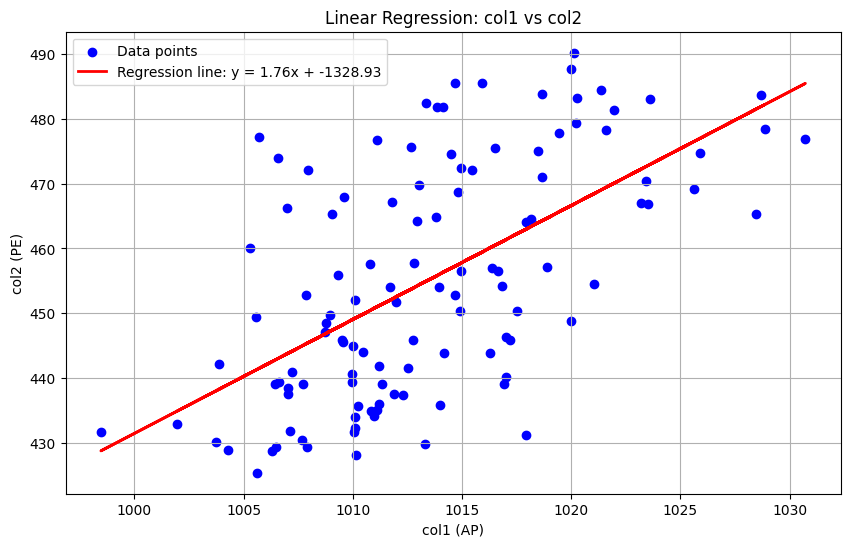

The regression line equation is: y = 1.76x + -1328.93


In [49]:
# Reshape col1 for regression model (needs to be 2D for sklearn)
X = col1.values.reshape(-1, 1)
y = col2.values

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the slope (m) and intercept (b) of the regression line
slope = model.coef_[0]
intercept = model.intercept_
print(f"the slope of the line is {slope} and intersept of the line is{intercept}")

# Make predictions (regression line)
y_pred = model.predict(X)

# Plotting the scatter plot and regression line
plt.figure(figsize=(10, 6))
plt.scatter(col1, col2, color='blue', label='Data points')
plt.plot(col1, y_pred, color='red', linewidth=2, label=f'Regression line: y = {slope:.2f}x + {intercept:.2f}')
plt.xlabel('col1 (AP)')
plt.ylabel('col2 (PE)')
plt.title('Linear Regression: col1 vs col2')
plt.legend()
plt.grid(True)
plt.show()

# Print the regression equation
print(f"The regression line equation is: y = {slope:.2f}x + {intercept:.2f}")